## HW

In [96]:
import pandas as pd
import numpy as np

df = pd.read_csv('world-data-2023.csv')
df[0:20]

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887
5,Antigua and Barbuda,223,AG,20.50%,443,0,15.33,1.0,"St. John's, Saint John",557,...,24.30%,2.76,"97,118",NaN,16.50%,43.00%,NaN,"23,800",17.060816,-61.796428
6,Argentina,17,AR,54.30%,"2,780,400","105,000",17.02,54.0,Buenos Aires,"201,348",...,17.60%,3.96,"44,938,712",61.30%,10.10%,106.30%,9.79%,"41,339,571",-38.416097,-63.616672
7,Armenia,104,AM,58.90%,"29,743","49,000",13.99,374.0,Yerevan,"5,156",...,81.60%,4.40,"2,957,731",55.60%,20.90%,22.60%,16.99%,"1,869,848",40.069099,45.038189
8,Australia,3,AU,48.20%,"7,741,220","58,000",12.60,61.0,Canberra,"375,908",...,19.60%,3.68,"25,766,605",65.50%,23.00%,47.40%,5.27%,"21,844,756",-25.274398,133.775136
9,Austria,109,AT,32.40%,"83,871","21,000",9.70,43.0,Vienna,"61,448",...,17.90%,5.17,"8,877,067",60.70%,25.40%,51.40%,4.67%,"5,194,416",47.516231,14.550072


Need to select well being, education, and health of children from columns. I checked all possibilities with df.columns

In [97]:
#Indicator selection

#Before anything, we need to convert the values to float. 
df['Co2-Emissions'] = [float(val.replace(',','')) if type(val) != float else val for val in df['Co2-Emissions'] ]; df['Land Area(Km2)'] = [float(val.replace(',','')) if type(val)==str else val for val in df['Land Area(Km2)'] ]
df['Out of pocket health expenditure'] = [float(val.replace('%','')) if type(val)==str else np.nan for val in df['Out of pocket health expenditure'] ]; df['Agricultural Land( %)'] = [float(val.replace('%','')) if type(val)==str else np.nan for val in df['Agricultural Land( %)'] ]; df['Gross primary education enrollment (%)'] = [float(val.replace('%','')) if type(val)==str else np.nan for val in df['Gross primary education enrollment (%)'] ]; df['Gross tertiary education enrollment (%)'] = [float(val.replace('%','')) if type(val)==str else np.nan for val in df['Gross tertiary education enrollment (%)'] ]; 


#Let's create an indicator for air pollution.
df['Air pollution estimated'] = df['Co2-Emissions'] / (df['Land Area(Km2)'] *(100-df['Agricultural Land( %)'])/100 ) #Basically, emission per non-agricultural land area, estimated as living area. You can take away forest area too to get a more accurate "living area", but since they improve air quality (bringing down pollution value) I decided not to take into account 

#Select the columns we want to use
columns_used = ['Country', 'Birth Rate', 'Fertility Rate', 'Gross primary education enrollment (%)',  'Infant mortality', 'Out of pocket health expenditure', 'Physicians per thousand', 'Air pollution estimated']
df = df[columns_used]
df[0:10]
#No more non-floats or ints in the data (nan is a float)

,Country,Birth Rate,Fertility Rate,Gross primary education enrollment (%),Infant mortality,Out of pocket health expenditure,Physicians per thousand,Air pollution estimated
0,Afghanistan,32.49,4.47,104.0,47.9,78.4,0.28,0.031733
1,Albania,11.78,1.62,107.0,7.8,56.9,1.20,0.277302
2,Algeria,24.28,3.02,109.9,20.1,28.1,1.72,0.076249
3,Andorra,7.20,1.27,106.4,2.7,36.4,3.33,1.670228
4,Angola,40.73,5.52,113.5,51.6,33.4,0.21,0.053005
5,Antigua and Barbuda,15.33,1.99,105.0,5.0,24.3,2.76,1.581555
6,Argentina,17.02,2.26,109.7,8.8,17.6,3.96,0.158462
7,Armenia,13.99,1.76,92.7,11.0,81.6,4.40,0.421780
8,Australia,12.60,1.74,100.3,3.1,19.6,3.68,0.093744
9,Austria,9.70,1.47,103.1,2.9,17.9,5.17,1.083800


In [98]:
df['Country'][150] = 'Sao Tome and Principe' #The dataset had one country name with non-ascii characters, after digging into it, it's São Tomé and Príncipe. (used if not 0 <= ord(c) <= 127: print(country)))

#Let's see countries with missing values
df[df.isna().sum(axis=1) > 0]

,Country,Birth Rate,Fertility Rate,Gross primary education enrollment (%),Infant mortality,Out of pocket health expenditure,Physicians per thousand,Air pollution estimated
21,Bosnia and Herzegovina,8.11,1.27,NaN,5.0,28.6,2.16,0.749989
42,Cuba,10.17,1.62,101.9,3.7,NaN,8.42,0.636241
56,Eswatini,NaN,NaN,NaN,NaN,11.3,NaN,NaN
73,Vatican City,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,Liechtenstein,9.90,1.44,104.7,NaN,NaN,NaN,0.470133
113,Monaco,5.90,NaN,NaN,2.6,6.1,6.56,NaN
120,Nauru,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,North Korea,13.89,1.90,112.8,13.7,NaN,3.67,0.300061
128,North Macedonia,NaN,NaN,NaN,NaN,35.6,NaN,NaN
133,Palestinian National Authority,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
#Set Bosnia's missing value to the average of Serbia and Montenegro
df['Gross primary education enrollment (%)'] [21]= (df['Gross primary education enrollment (%)'] [153]+ df['Gross primary education enrollment (%)'] [115])/2 
# Set Cuba's missing value to Dominican Republic's
df['Out of pocket health expenditure'] [42] = df['Out of pocket health expenditure'] [49] 

#Liechtenstein's missing value is set to the average of Switzerland and Austria
df['Infant mortality'] [98] = (df['Infant mortality'] [169]+ df['Infant mortality'] [9])/2
df['Physicians per thousand'] [98] = (df['Physicians per thousand'] [169]+ df['Physicians per thousand'] [9])/2
df['Out of pocket health expenditure'] [98] = (df['Out of pocket health expenditure'] [169]+ df['Out of pocket health expenditure'] [9])/2
#North Korea's missing value is set to China's
df['Out of pocket health expenditure'] [127] = df['Out of pocket health expenditure'] [36]
#San Marino's air pollution is set to Italy's
df['Air pollution estimated'][149] = df['Air pollution estimated'][83]
#Somalia's missing value is set to Djibouti's 
df['Out of pocket health expenditure'] [160] = df['Out of pocket health expenditure'] [47]
# Tuvalu
df['Birth Rate'] [181] = 23.0; df['Fertility Rate'] [181] = 3.2 #Internet sources https://data.worldbank.org/indicator/SP.DYN.CBRT.IN?locations=TV

# Filter the too unknown data countries
df = df[(df['Country'] != 'Vatican City') & (df['Country'] != 'Palestinian National Authority') & (df['Country'] != 'Monaco') & (df['Country'] != 'North Macedonia')& (df['Country'] != 'Nauru') & (df['Country'] != 'South Sudan') & (df['Country'] != 'Eswatini')].reset_index(drop=True)


C:\Users\hanic\AppData\Local\Temp\ipykernel_35200\3569896788.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Out of pocket health expenditure'] [98] = (df['Out of pocket health expenditure'] [169]+ df['Out of pocket health expenditure'] [9])/2
C:\Users\hanic\AppData\Local\Temp\ipykernel_35200\3569896788.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Out of pocket health expenditure'] [127] = df['Out of pocket health expenditure'] [36]
C:\Users\hanic\AppData\Local\Temp\ipykernel_35200\3569896788.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the c

In [100]:
#Lastly, let's normalize data
#I do this because for the clustering algorithm, I want to give kind of equal weight to all the indicators

df[df.columns[1:]] = (df[df.columns[1:]]-df[df.columns[1:]].mean())/df[df.columns[1:]].std()
df[0:10]

,Country,Birth Rate,Fertility Rate,Gross primary education enrollment (%),Infant mortality,Out of pocket health expenditure,Physicians per thousand,Air pollution estimated
0,Afghanistan,1.243671,1.396625,0.106780,1.384506,2.414139,-0.932679,-0.274853
1,Albania,-0.856705,-0.839744,0.338009,-0.687951,1.279243,-0.379136,-0.228809
2,Algeria,0.411025,0.258823,0.561530,-0.052260,-0.240990,-0.066264,-0.266506
3,Andorra,-1.321202,-1.114386,0.291763,-0.951530,0.197133,0.902435,0.032367
4,Angola,2.079359,2.220550,0.839005,1.575731,0.038775,-0.974796,-0.270865
5,Antigua and Barbuda,-0.496670,-0.549409,0.183856,-0.832661,-0.441576,0.559479,0.015741
6,Argentina,-0.325273,-0.337542,0.546115,-0.636269,-0.795242,1.281491,-0.251091
7,Armenia,-0.632571,-0.729888,-0.764184,-0.522568,2.583054,1.546228,-0.201719
8,Australia,-0.773542,-0.745582,-0.178403,-0.930857,-0.689670,1.113021,-0.263226
9,Austria,-1.067656,-0.957448,0.037411,-0.941194,-0.779406,2.009519,-0.077589


In [101]:
#Hierarchical Clustering  (copied mostly from the given notebook)


#import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering



def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


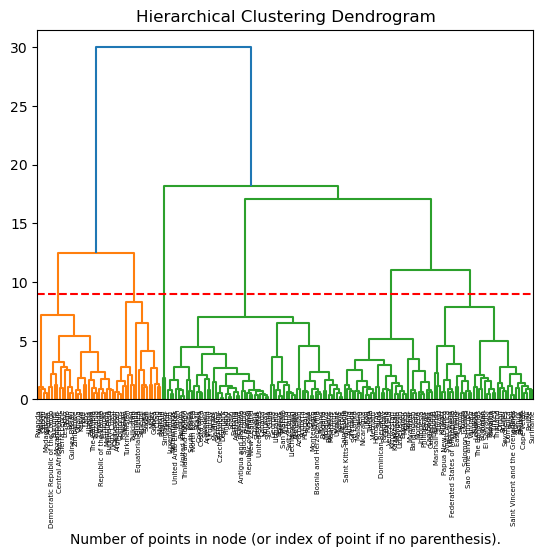

In [104]:
def llf(id): # For labeling on the dendrogram, without this x axis would be just numbers
    return '%s' % (df['Country'][id])

# First, let's check the whole tree

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

X = df.set_index('Country').values
model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", leaf_label_func=llf,)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.axhline(y=9, color='r', linestyle='--') # I chose this threshold afterwards, so I plotted it here
plt.show()


In [114]:
#I disect (or septsect) the tree at the red line, at which layer theer are 6 distinct clusters
model = AgglomerativeClustering(n_clusters=6, compute_distances=True)

X = df.set_index('Country').values
model = model.fit(X)

print(model.labels_,)

[0 2 1 3 4 3 3 3 3 3 3 1 5 2 3 3 3 1 4 1 1 3 1 3 1 3 4 4 4 1 2 0 3 4 0 3 3
 3 0 4 3 3 3 3 3 4 3 1 1 2 2 2 1 0 0 3 4 1 3 3 4 4 3 3 4 3 2 2 0 4 2 4 2 3
 3 2 2 2 0 3 3 3 1 3 1 2 4 1 1 2 4 3 1 4 4 2 3 3 3 4 4 2 3 0 3 1 4 3 2 1 3
 2 3 2 4 2 1 2 3 3 2 0 0 3 3 1 0 1 1 1 2 2 2 3 3 3 1 3 4 2 2 1 1 3 1 3 0 3
 1 4 5 3 3 1 0 1 3 3 2 0 1 3 3 2 0 4 1 1 4 1 3 2 1 0 1 4 3 3 3 3 3 2 1 2 2
 0 4 4]


In [111]:
print('Sections (clusters):')
print(df['Country'][model.labels_ == 0].values, '\n')
print(df['Country'][model.labels_ == 1].values, '\n')
print(df['Country'][model.labels_ == 2].values, '\n')

Sections (clusters):
['Afghanistan' 'Cameroon' 'Chad' 'Comoros' 'Equatorial Guinea' 'Eritrea'
 'Guinea' 'Iraq' 'Mali' 'Niger' 'Nigeria' 'Pakistan' 'Senegal' 'Somalia'
 'Sudan' 'Tajikistan' 'Turkmenistan' 'Yemen'] 

['Algeria' 'The Bahamas' 'Belize' 'Bhutan' 'Bolivia' 'Botswana' 'Brunei'
 'Cape Verde' 'Djibouti' 'Dominica' 'El Salvador' 'Fiji' 'Jamaica'
 'Jordan' 'Kiribati' 'Kuwait' 'Lebanon' 'Marshall Islands'
 'Federated States of Micronesia' 'Namibia' 'Oman' 'Palau' 'Panama'
 'Papua New Guinea' 'Romania' 'Saint Vincent and the Grenadines' 'Samoa'
 'Sao Tome and Principe' 'Seychelles' 'Solomon Islands' 'South Africa'
 'Suriname' 'Thailand' 'East Timor' 'Tonga' 'Turkey' 'Tuvalu' 'Vanuatu'] 

['Albania' 'Bangladesh' 'Cambodia' 'Dominican Republic' 'Ecuador' 'Egypt'
 'Grenada' 'Guatemala' 'Guyana' 'Honduras' 'India' 'Indonesia' 'Iran'
 'Kazakhstan' 'Kyrgyzstan' 'Libya' 'Malaysia' 'Mexico' 'Mongolia'
 'Morocco' 'Myanmar' 'Nepal' 'Nicaragua' 'Paraguay' 'Peru' 'Philippines'
 'Saint Kitts an

In [112]:
print(df['Country'][model.labels_ == 3].values, '\n')
print(df['Country'][model.labels_ == 4].values, '\n')
print(df['Country'][model.labels_ == 5].values, '\n')

['Andorra' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia'
 'Austria' 'Azerbaijan' 'Barbados' 'Belarus' 'Belgium'
 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Canada' 'Chile' 'China'
 'Colombia' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czech Republic'
 'Denmark' 'Estonia' 'Finland' 'France' 'Georgia' 'Germany' 'Greece'
 'Hungary' 'Iceland' 'Republic of Ireland' 'Israel' 'Italy' 'Japan'
 'Latvia' 'Liechtenstein' 'Lithuania' 'Luxembourg' 'Maldives' 'Malta'
 'Mauritius' 'Moldova' 'Montenegro' 'Netherlands' 'New Zealand'
 'North Korea' 'Norway' 'Poland' 'Portugal' 'Qatar' 'Russia' 'San Marino'
 'Saudi Arabia' 'Serbia' 'Slovakia' 'Slovenia' 'South Korea' 'Spain'
 'Sweden' 'Switzerland' 'Trinidad and Tobago' 'Ukraine'
 'United Arab Emirates' 'United Kingdom' 'United States' 'Uruguay'] 

['Angola' 'Benin' 'Burkina Faso' 'Burundi' 'Ivory Coast'
 'Central African Republic' 'Republic of the Congo'
 'Democratic Republic of the Congo' 'Ethiopia' 'Gabon' 'The Gambia'
 'Ghana' 'Guinea-Bissa

## Paragraph

I selected educational, birth and health indicators to cluster countries. Health and education speak for themselves, birth/fertility rates are I believe good indicators too, as in some developed countries where the fertility rate is around 1.0-2.0 a higher rate can mean parents commit more to having children simply because it's thought to be easier to raise a child than in lower fertility rate countries, so I think this could be meaningful too. Plus a too high (like 4+) fertility rate could mean the country is a third-world country, so it helps cluster them together. (Of course, real life is not as simple as this, ethnicities matter a lot in fertility rate too and poor/rich regions inside a country, but these were not attributes here.) I added an air quality column too, not really meaningful but one could argue that it affects children substantially, maybe important for the homework exercise. All used attributes were already normalized to countries (e.g. percentiles, infant mortality is measured per 1000 infants etc.) so that was not an issue but for clustering, I normalized them.

For the (agglomerative) clustering, I used the default ward clustering, which minimizes merging variance, I am not sure if it's better to use it here than just Euclidean distance but generally seems like a good pick for clustering. I first plotted the whole clustering tree, and then visually choose y=9 as a good threshold value: at this level, the cluster "distances" (variances in this case) are quite "high", to combine two clusters would create a great increase in variance, which would mean these are seperate groups, and below this level, the tree branches vastly at "values that make a uniform distribution" (look at the plot, it seems like for every tenth at the y-axis below 9, there is a corresponding branch), so I feel less "groupedness". Probably a good pick, this resulted in 6 clusters.

Results: Looking at the 6 clusters above, they are mostly not surpising. Mostly all developed countries are in group index 3, a lot of island-countries are in group ID 1 and 2 (which maybe suggests that geography indirectly influences children wellbeing, like it still has an impact on economy which has an impact on children wellbeing), group ID 4 is almost only (poor) African countries only (Haiti and Laos are the black sheep). There is one group that is really bizarre, the last group consisting of Singapore and Bahrain only. On the plot they must be the most left green branch, they are clustered together at fairly low variance, then to cluster them to any other group would create huge variance, which is very surprising. They are two very wealthy small countries, but you would expect more countries to be in their group. So looking at the data, comparing it to European countries, the US, UAE, etc. we can see what caused this clustering: while most developed countries have low air pollution (few tenths, could be negative), these two countries have 8.45 and 9.63 value for air pollution, which is huuuuuge. This probably suggests two things: 

1) the attribute I created should be finetuned better + definately should have less weight in the clustering,

2) even after normalizing, values around 9 are very much out of bounds so probably the (x-mean)/std normalization is not good enough for this attribute. (I would still keep it for other attributes, as it seems to separate better than min-max 0-1 normalization.)

Aside from that, the clustering seems fairly "accurate" as to what a human (well, me) would suggest/believe.

